In [7]:
import dicom2nifti
import nibabel as nib
import nilearn as nil
from nilearn import plotting
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
from Data_import import load_image, visualise_image, plot_slice

# Settings

In [2]:
DATA_DIR = "C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart"
TRAIN_IMAGES = "imagesTr"
TRAIN_LABELS ="labelsTr"
TEST_IMAGES = "imagesTs"


In [3]:
train_images = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_IMAGES)))
train_labels = sorted(os.listdir(os.path.join(DATA_DIR, TRAIN_LABELS)))
data_dicts = [{"image": os.path.join(DATA_DIR, TRAIN_IMAGES ,image_name), "label": os.path.join(DATA_DIR, TRAIN_LABELS, label_name)} for image_name, label_name in zip(train_images, train_labels)]
train_files, val_files = data_dicts[:-4], data_dicts[-4:] # 16 train and 4 validation
train_files

[{'image': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\imagesTr\\la_003.nii.gz',
  'label': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\labelsTr\\la_003.nii.gz'},
 {'image': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\imagesTr\\la_004.nii.gz',
  'label': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\labelsTr\\la_004.nii.gz'},
 {'image': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\imagesTr\\la_005.nii.gz',
  'label': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\labelsTr\\la_005.nii.gz'},
 {'image': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\imagesTr\\la_007.nii.gz',
  'label': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\labelsTr\\la_007.nii.gz'},
 {'image': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\imagesTr\\la_009.nii.gz',
  'label': 'C:\\awilde\\britta\\LTU\\DataMining\\Data\\Task02_Heart\\labelsTr\\la_009.nii.gz'},
 {'image': 'C:\\awilde\\britta\\LTU\\DataMini

Image shape: (320, 320, 130)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 130   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z     

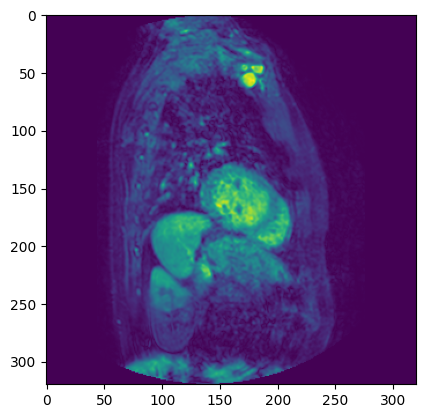

Image shape: (320, 320, 110)
Metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 320 320 110   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1.   1.25 1.25 1.37 0.   0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       :

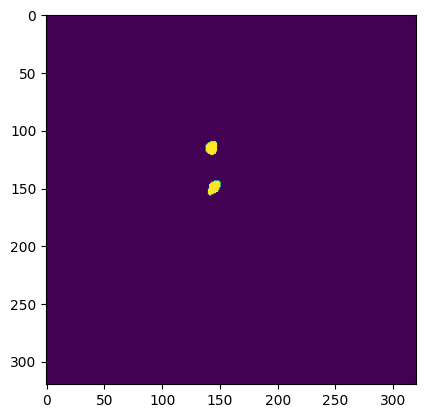

In [4]:
tr_img_001, tr_data_001 = load_image(data_dicts[0]["image"])
#visualise_image(tr_data_001)
plot_slice(tr_data_001, 30)

#Visualise one label image
label_img_001, label_data_001 = load_image(data_dicts[1]["label"])
#visualise_image(label_data_001)
plot_slice(label_data_001, 30)

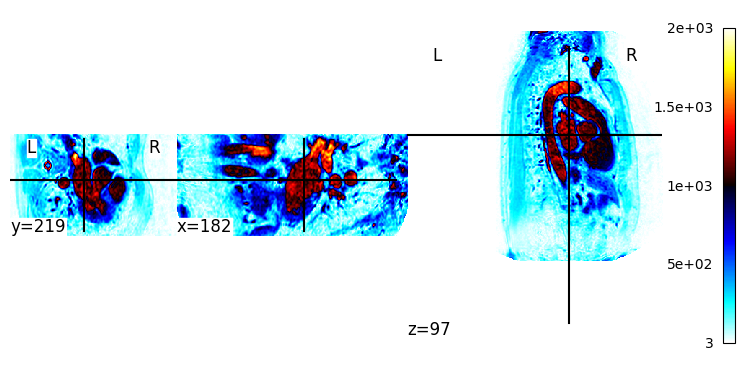

In [6]:
plotting.plot_stat_map(data_dicts[0]["image"], threshold=3)


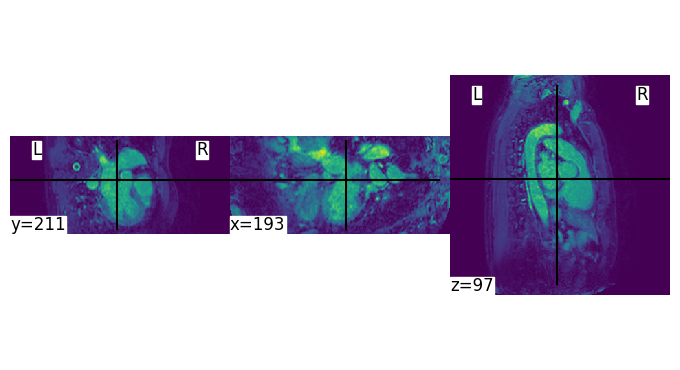

In [8]:
plotting.plot_img(data_dicts[0]["image"])

c:\awilde\britta\LTU\DataMining\DataMiningProjectWork\.conda\Lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



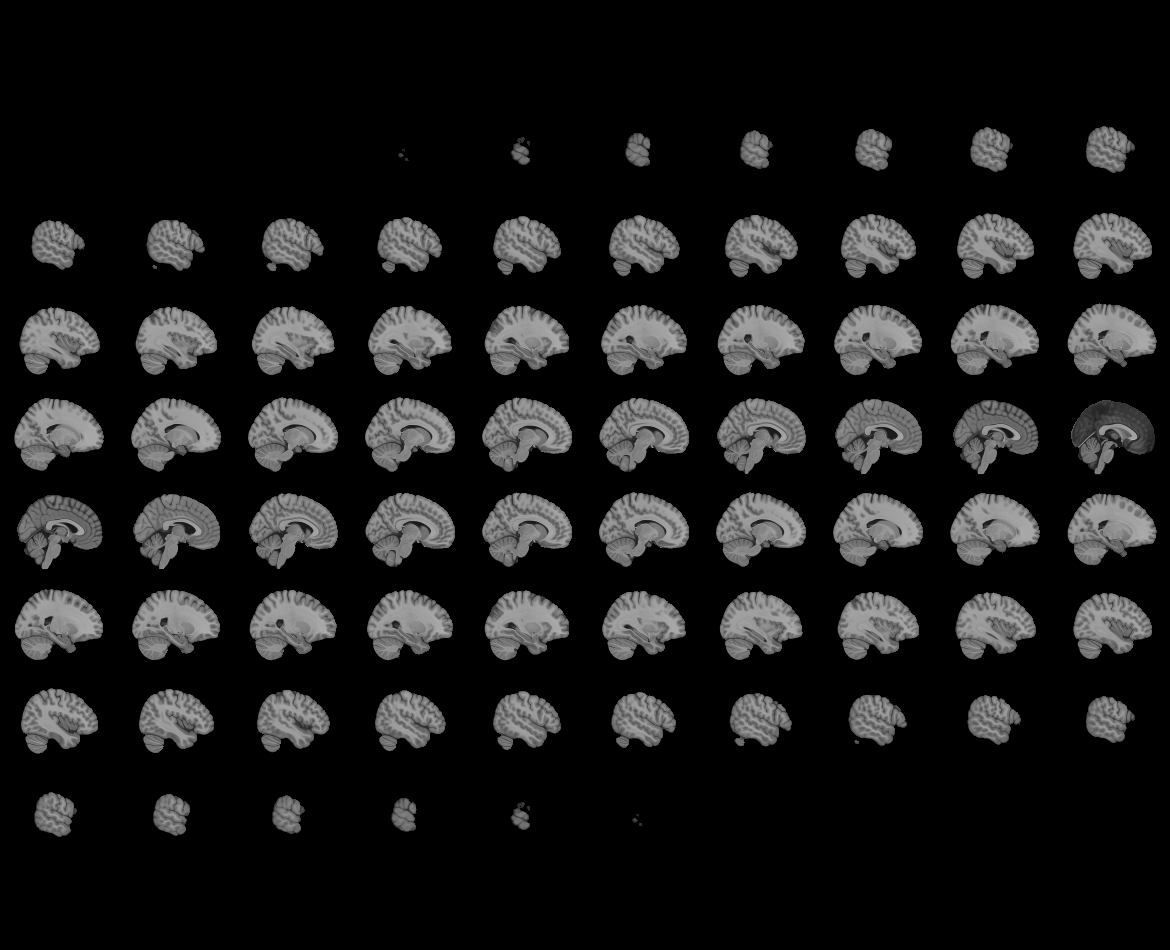
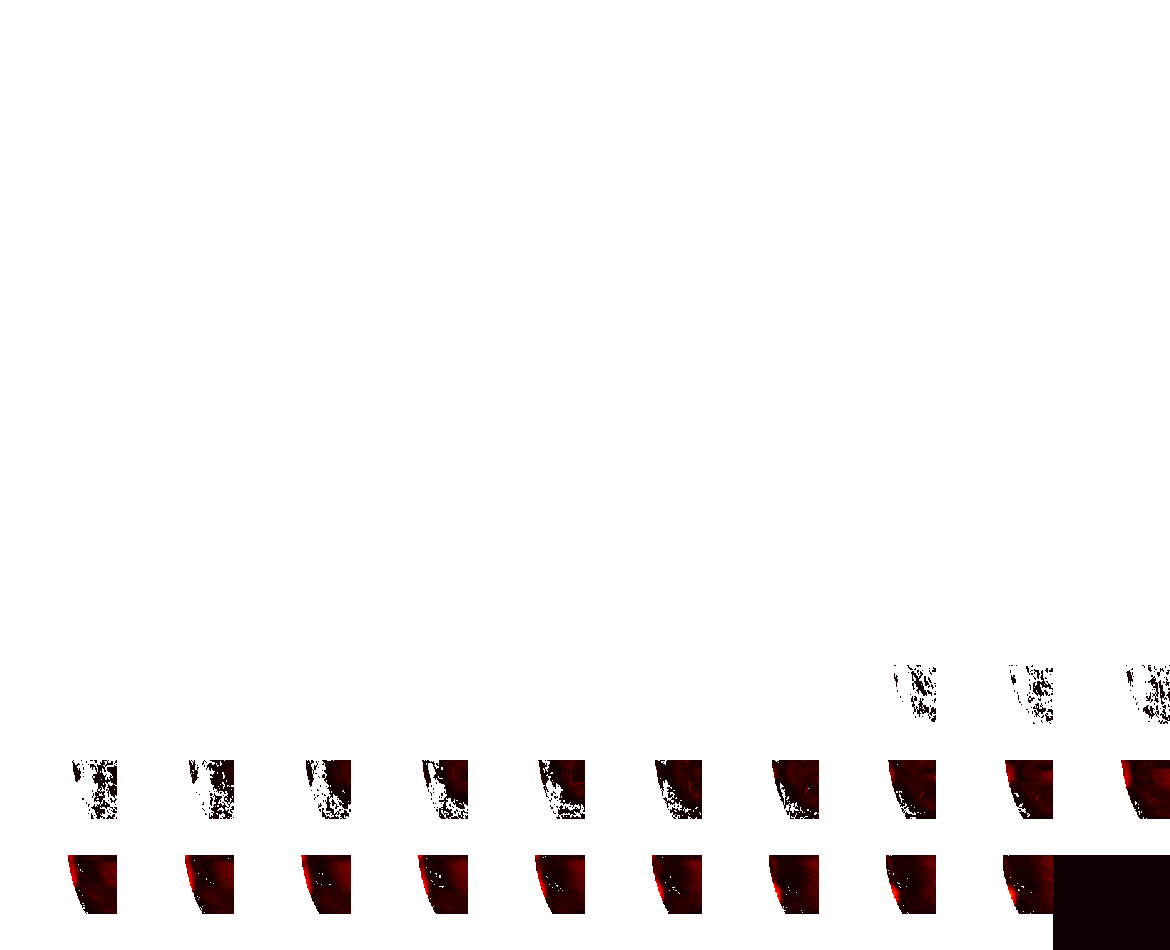

In [12]:
view = plotting.view_img(data_dicts[0]["image"], threshold=10)
view

# Plot Image with label?!

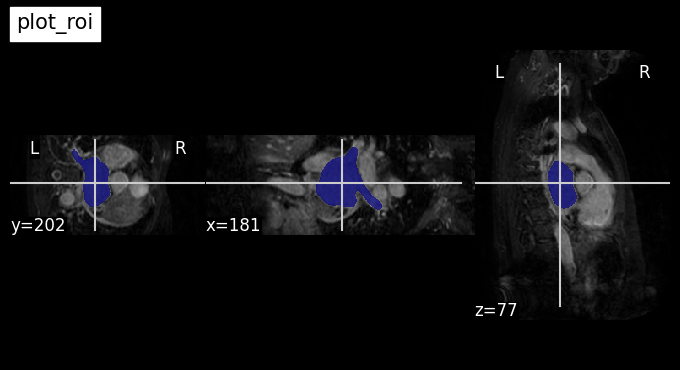

In [11]:
plotting.plot_roi(
    data_dicts[1]["label"], bg_img=data_dicts[1]["image"], title="plot_roi"
)